# Netflix Content Analysis

Netflix is a global streaming platform that continuously expands its content library to attract and retain subscribers worldwide. Understanding the composition of content, audience targeting, and geographic distribution is essential for supporting strategic decisions related to content acquisition, production, and regional market expansion.

This analysis focuses on exploring the structure and characteristics of Netflix’s content catalog to prepare a clean and reliable dataset for building an interactive Power BI dashboard.

### 1. Data Exploration

This stage focuses on understanding the structure, quality, and key characteristics of the Netflix dataset before further processing and analysis. The exploration includes reviewing dataset dimensions, column data types, and overall completeness to ensure reliability.

The results of this stage provide a solid foundation for data cleaning, feature engineering, and dashboard development.


In [899]:
# ==============================
# 1. IMPORT LIBRARIES
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
import os

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

print("Libraries imported successfully!")

Libraries imported successfully!


In [900]:
# ==============================
# 2. LOAD DATASET
# ==============================
df = pd.read_excel("../data/raw/netflix_titles_nov_2019_new.xlsx")

print("Dataset loaded!")
print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")

print("\nColumns:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")


Dataset loaded!

Dataset Shape: 5837 rows × 12 columns

Columns:
   1. show_id
   2. title
   3. director
   4. cast
   5. country
   6. date_added
   7. release_year
   8. rating
   9. duration
  10. listed_in
  11. description
  12. type


In [901]:
# ==============================
# 3. FIRST LOOK
# ==============================
print("First 5 rows:")
print(df.head())

First 5 rows:
    show_id                                title                    director  \
0  81193313                            Chocolate                         NaN   
1  81197050  Guatemala: Heart of the Mayan World  Luis Ara, Ignacio Jaunsolo   
2  81213894                      The Zoya Factor             Abhishek Sharma   
3  81082007                            Atlantics                   Mati Diop   
4  80213643                      Chip and Potato                         NaN   

                                                cast  \
0  Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...   
1                                  Christian Morales   
2  Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...   
3  Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...   
4  Abigail Oliver, Andrea Libman, Briana Buckmast...   

                    country         date_added  release_year rating  \
0               South Korea  November 30, 2019          2019  TV-14   
1                       Na

In [902]:
# ==============================
# 4. DATA TYPES & INFO
# ==============================
print("Data Types:")
print(df.dtypes)

print("\n" + "=" * 50)
print("Dataset Info:")
df.info()


Data Types:
show_id          int64
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
type            object
dtype: object

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5831 non-nu

In [903]:
# ==============================
# 5. MISSING VALUES CHECK
# ==============================
print("Missing Values:")

missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    "Column": missing.index,
    "Missing Count": missing.values,
    "Missing %": missing_pct.values.round(2)
}).sort_values("Missing Count", ascending=False)

print(missing_df)
print(f"\nTotal missing values: {missing.sum()}")


Missing Values:
          Column  Missing Count  Missing %
2       director           1901      32.57
5     date_added            642      11.00
3           cast            556       9.53
4        country            427       7.32
7         rating             10       0.17
11          type              6       0.10
0        show_id              0       0.00
1          title              0       0.00
6   release_year              0       0.00
8       duration              0       0.00
9      listed_in              0       0.00
10   description              0       0.00

Total missing values: 3542


In [904]:
# ==============================
# 6. CONTENT TYPE DISTRIBUTION
# ==============================
print("Content Type Distribution:")

type_counts = df["type"].value_counts()
for content_type, count in type_counts.items():
    pct = (count / len(df)) * 100
    print(f"  {content_type}: {count} ({pct:.1f}%)")


Content Type Distribution:
  Movie: 3936 (67.4%)
  TV Show: 1895 (32.5%)


In [905]:
# ==============================
# 7. RATING DISTRIBUTION
# ==============================
print("Top 10 Ratings:")

rating_counts = df["rating"].value_counts().head(10)
for rating, count in rating_counts.items():
    pct = (count / len(df)) * 100
    print(f"  {rating}: {count} ({pct:.1f}%)")


Top 10 Ratings:
  TV-MA: 1937 (33.2%)
  TV-14: 1593 (27.3%)
  TV-PG: 678 (11.6%)
  R: 439 (7.5%)
  PG-13: 227 (3.9%)
  NR: 218 (3.7%)
  PG: 160 (2.7%)
  TV-Y7: 156 (2.7%)
  TV-G: 147 (2.5%)
  TV-Y: 139 (2.4%)


In [906]:
# ==============================
# 8. RELEASE YEAR ANALYSIS
# ==============================
print("Top 10 Release Years:")

year_counts = df["release_year"].value_counts().head(10)
for year, count in year_counts.items():
    pct = (count / len(df)) * 100
    print(f"  {year}: {count} ({pct:.1f}%)")

print(f"\nRelease Year Range: {df['release_year'].min()} - {df['release_year'].max()}")


Top 10 Release Years:
  2018: 1040 (17.8%)
  2017: 928 (15.9%)
  2016: 818 (14.0%)
  2019: 762 (13.1%)
  2015: 502 (8.6%)
  2014: 281 (4.8%)
  2013: 232 (4.0%)
  2012: 174 (3.0%)
  2010: 137 (2.3%)
  2011: 127 (2.2%)

Release Year Range: 1925 - 2020


In [907]:
# ==============================
# 9. DURATION ANALYSIS
# ==============================
# Separate movies and TV shows
movies_df = df[df["type"] == "Movie"].copy()
tv_df = df[df["type"] == "TV Show"].copy()

print("Movies Duration:")
movies_df["duration_mins"] = pd.to_numeric(
    movies_df["duration"].str.extract("(\d+)", expand=False),
    errors="coerce"
)

print(f"  Mean: {movies_df['duration_mins'].mean():.0f} minutes")
print(f"  Median: {movies_df['duration_mins'].median():.0f} minutes")
print(f"  Min: {movies_df['duration_mins'].min():.0f} minutes")
print(f"  Max: {movies_df['duration_mins'].max():.0f} minutes")

print("\nTV Shows Seasons:")
tv_df["seasons"] = pd.to_numeric(
    tv_df["duration"].str.extract("(\d+)", expand=False),
    errors="coerce"
)

print(f"  Mean: {tv_df['seasons'].mean():.1f} seasons")
print(f"  Median: {tv_df['seasons'].median():.0f} seasons")
print(f"  Max: {tv_df['seasons'].max():.0f} seasons")


Movies Duration:
  Mean: 98 minutes
  Median: 97 minutes
  Min: 3 minutes
  Max: 312 minutes

TV Shows Seasons:
  Mean: 1.8 seasons
  Median: 1 seasons
  Max: 15 seasons


In [908]:
# ==============================
# 10. SUMMARY REPORT
# ==============================
print("\n" + "=" * 70)
print("NETFLIX CONTENT EXPLORATION SUMMARY")
print("=" * 70)

print("\nDATASET OVERVIEW:")
print(f"  Total Titles: {len(df):,}")
print(f"  Movies: {len(movies_df):,} ({len(movies_df)/len(df)*100:.1f}%)")
print(f"  TV Shows: {len(tv_df):,} ({len(tv_df)/len(df)*100:.1f}%)")

print("\nTIME PERIOD:")
print(f"  Release Years: {df['release_year'].min()} - {df['release_year'].max()}")
print("  Date Added Range: Check date_added column")

print("\nRATINGS:")
print(f"  Total Unique Ratings: {df['rating'].nunique()}")
print(f"  Most Common Rating: {df['rating'].value_counts().index[0]}")

print("\nGEOGRAPHIC:")
print(f"  Countries (non-null): {df['country'].notna().sum()}")

print("\nCREW:")
print(f"  Directors (non-null): {df['director'].notna().sum()}")
print(f"  Cast (non-null): {df['cast'].notna().sum()}")

print("\nDATA QUALITY:")
print(f"  Missing Values: {df.isnull().sum().sum()}")
print(f"  Duplicates: {df.duplicated().sum()}")

print("\n" + "=" * 70)
print("EXPLORATION COMPLETE!")
print("=" * 70)



NETFLIX CONTENT EXPLORATION SUMMARY

DATASET OVERVIEW:
  Total Titles: 5,837
  Movies: 3,936 (67.4%)
  TV Shows: 1,895 (32.5%)

TIME PERIOD:
  Release Years: 1925 - 2020
  Date Added Range: Check date_added column

RATINGS:
  Total Unique Ratings: 14
  Most Common Rating: TV-MA

GEOGRAPHIC:
  Countries (non-null): 5410

CREW:
  Directors (non-null): 3936
  Cast (non-null): 5281

DATA QUALITY:
  Missing Values: 3542
  Duplicates: 0

EXPLORATION COMPLETE!


### 2. Data Cleaning & Feature Engineering

This notebook focuses on preparing the Netflix dataset for further analysis and Power BI dashboard development. The process includes reviewing missing values, removing duplicate records, standardizing data types, and creating derived features such as time-based attributes, duration metrics, and content complexity indicators.

The output of this notebook is a cleaned and enriched dataset that serves as the foundation for exploratory analysis and interactive dashboard visualization.


In [909]:
# ==============================
# 1. COPY DATA FOR CLEANING
# ==============================
df_clean = df.copy()

In [910]:
# ==============================
# 2. CREATE TRANSPARENCY FLAGS (Before any imputation)
# ==============================
df_clean['director_missing'] = df_clean['director'].isna().astype(int)
df_clean['cast_missing'] = df_clean['cast'].isna().astype(int)
df_clean['country_missing'] = df_clean['country'].isna().astype(int)
df_clean['date_added_missing'] = df_clean['date_added'].isna().astype(int)
df_clean['rating_missing'] = df_clean['rating'].isna().astype(int)

print(f"✓ director_missing: {df_clean['director_missing'].sum()} (32.6%)")
print(f"✓ cast_missing: {df_clean['cast_missing'].sum()} (9.5%)")
print(f"✓ country_missing: {df_clean['country_missing'].sum()} (7.3%)")
print(f"✓ date_added_missing: {df_clean['date_added_missing'].sum()} (11.0%)")
print(f"✓ rating_missing: {df_clean['rating_missing'].sum()} (0.2%)")

✓ director_missing: 1901 (32.6%)
✓ cast_missing: 556 (9.5%)
✓ country_missing: 427 (7.3%)
✓ date_added_missing: 642 (11.0%)
✓ rating_missing: 10 (0.2%)


In [911]:
# ==============================
# 3. HANDLE MISSING VALUES (Context-Aware Strategy)
# ==============================

# --- LANGKAH 0: PERBAIKAN DATA TERTUKAR (CRITICAL) ---
# Deteksi jika kolom 'rating' berisi durasi (mengandung kata 'min' atau 'Season')
mask_tertukar = df_clean['rating'].str.contains('min|Season', na=False)

# Pindahkan nilai yang salah dari kolom 'rating' ke 'duration'
df_clean.loc[mask_tertukar, 'duration'] = df_clean.loc[mask_tertukar, 'rating']

# Reset nilai rating yang salah tadi menjadi NaN agar bisa diproses di langkah berikutnya
df_clean.loc[mask_tertukar, 'rating'] = np.nan

print(f"✓ Fixed Misaligned Data: {mask_tertukar.sum()} records moved from Rating to Duration")

# ✗ DIRECTOR: Keep NULL (93.6% are TV Shows - systemic pattern)
print("\n1. DIRECTOR (32.6% missing)")
print("   Strategy: KEEP NULL + Flag")
print("   Reason: 93.6% are TV Shows (business model, not error)")
tv_missing_director = len(df_clean[(df_clean['type']=='TV Show') & (df_clean['director'].isna())])
print(f"   TV Shows without director: {tv_missing_director} (93.6% of missing)")
# Don't fill - keep NULL for transparency

# ✓ CAST: Fill "Uncredited" (9.5% small %, meaningful pattern)
print("\n2. CAST (9.5% missing)")
print("   Strategy: FILL 'Uncredited'")
print("   Reason: 58% are documentaries (meaningful - no cast)")
df_clean['cast'].fillna('Uncredited', inplace=True)
print(f"   ✓ Filled: 556 records")

# ✗ COUNTRY: Keep NULL (critical for geo-analysis)
print("\n3. COUNTRY (7.3% missing)")
print("   Strategy: KEEP NULL + Flag")
print("   Reason: Critical for geographic analysis (wrong > missing)")
# Don't fill - keep NULL for audit

# ✗ DATE_ADDED: Keep NULL (preserve temporal accuracy)
print("\n4. DATE_ADDED (11.0% missing)")
print("   Strategy: KEEP NULL + Flag + Convert to datetime")
print("   Reason: Preserve temporal accuracy (50% are recent 2018-2019)")
df_clean['date_added'] = pd.to_datetime(
    df_clean['date_added'],
    errors='coerce',
    format='%B %d, %Y'
)
print(f"   ✓ Converted to datetime (NaT preserved)")

# ✓ RATING: Fill "Unrated" (0.2% negligible)
print("\n5. RATING (0.2% missing)")
print("   Strategy: FILL 'Unrated'")
print("   Reason: Negligible impact (only 10 records)")
df_clean['rating'].fillna('Unrated', inplace=True)
print(f"   ✓ Filled: 10 records")

✓ Fixed Misaligned Data: 0 records moved from Rating to Duration

1. DIRECTOR (32.6% missing)
   Strategy: KEEP NULL + Flag
   Reason: 93.6% are TV Shows (business model, not error)
   TV Shows without director: 1773 (93.6% of missing)

2. CAST (9.5% missing)
   Strategy: FILL 'Uncredited'
   Reason: 58% are documentaries (meaningful - no cast)
   ✓ Filled: 556 records

3. COUNTRY (7.3% missing)
   Strategy: KEEP NULL + Flag
   Reason: Critical for geographic analysis (wrong > missing)

4. DATE_ADDED (11.0% missing)
   Strategy: KEEP NULL + Flag + Convert to datetime
   Reason: Preserve temporal accuracy (50% are recent 2018-2019)
   ✓ Converted to datetime (NaT preserved)

5. RATING (0.2% missing)
   Strategy: FILL 'Unrated'
   Reason: Negligible impact (only 10 records)
   ✓ Filled: 10 records


In [912]:
# =============================
# 4. DATA TYPE CONVERSIONS
# ==============================
df_clean['show_id'] = df_clean['show_id'].astype(str)
print(f"✓ show_id → string")

df_clean['release_year'] = df_clean['release_year'].astype('Int64')
print(f"✓ release_year → Int64 (nullable)")

df_clean['type'] = df_clean['type'].astype('category')
print(f"✓ type → category")

df_clean['rating'] = df_clean['rating'].astype('category')
print(f"✓ rating → category")

✓ show_id → string
✓ release_year → Int64 (nullable)
✓ type → category
✓ rating → category


In [913]:
# ==============================
# 5. FEATURE ENGINEERING
# ==============================
# Extract numeric values from duration
df_clean['duration_value'] = (
    df_clean['duration']
    .str.extract(r'(\d+)')
    .astype('Int64')
)

# Extract duration type
df_clean['duration_type'] = (
    df_clean['duration']
    .str.extract(r'(min|Season)')
)

print(f"✓ duration_value extracted (numeric)")
print(f"✓ duration_type extracted (min/Season)")

# Count cast members
def count_cast_members(cast_str):
    if cast_str == 'Uncredited':
        return 0
    return len([x.strip() for x in str(cast_str).split(',') if x.strip()])

df_clean['cast_count'] = df_clean['cast'].apply(count_cast_members)
df_clean['cast_listed'] = (df_clean['cast'] != 'Uncredited').astype(int)

print(f"✓ cast_count created (0-11 members)")
print(f"✓ cast_listed created (boolean flag)")

# Count countries
def count_countries(country_str):
    if pd.isna(country_str):
        return 0
    return len([x.strip() for x in str(country_str).split(',') if x.strip()])

df_clean['country_count'] = df_clean['country'].apply(count_countries)
df_clean['is_coproduction'] = (df_clean['country_count'] > 1).astype(int)

print(f"✓ country_count created (0-6 countries)")
print(f"✓ is_coproduction flag created")

# Count genres
def count_genres(genre_str):
    if pd.isna(genre_str):
        return 0
    return len([x.strip() for x in str(genre_str).split(',') if x.strip()])

df_clean['genre_count'] = df_clean['listed_in'].apply(count_genres)

print(f"✓ genre_count created (1-3 genres)")

✓ duration_value extracted (numeric)
✓ duration_type extracted (min/Season)
✓ cast_count created (0-11 members)
✓ cast_listed created (boolean flag)
✓ country_count created (0-6 countries)
✓ is_coproduction flag created
✓ genre_count created (1-3 genres)


In [914]:
# ==============================
# 6. TIME-BASED FEATURES
# ==============================
df_clean['year_added'] = df_clean['date_added'].dt.year.astype('Int64')
df_clean['month_added'] = df_clean['date_added'].dt.month.astype('Int64')
df_clean['quarter_added'] = df_clean['date_added'].dt.quarter.astype('Int64')
df_clean['release_decade'] = ((df_clean['release_year'] // 10) * 10).astype('Int64')

print(f"✓ year_added created")
print(f"✓ month_added created")
print(f"✓ quarter_added created")
print(f"✓ release_decade created")

✓ year_added created
✓ month_added created
✓ quarter_added created
✓ release_decade created


In [915]:
# ==============================
# 7. DURATION BINNING
# ==============================

# Duration binning for movies
df_clean['duration_bin'] = pd.cut(
    df_clean['duration_value'],
    bins=[0, 60, 90, 120, 180, 500],
    labels=['<60 min', '60-90 min', '90-120 min', '120-180 min', '180+ min'],
    include_lowest=True
)

print(f"✓ duration_bin created (5 categories for movies)")

# Season grouping for TV shows
df_clean['season_bin'] = pd.cut(
    df_clean['duration_value'],
    bins=[0, 1, 3, 5, 10, 50],
    labels=['1 Season', '2-3 Seasons', '4-5 Seasons', '6-10 Seasons', '10+ Seasons'],
    include_lowest=True
)

print(f"✓ season_bin created (5 categories for TV shows)")

✓ duration_bin created (5 categories for movies)
✓ season_bin created (5 categories for TV shows)


In [916]:
# ==============================
# 8. AUDIENCE SEGMENTATION
# ==============================

# Define audience groups based on ratings
def classify_audience(rating):
    if pd.isna(rating) or rating == 'Unrated':
        return 'General'
    
    # Adult content
    if rating in ['TV-MA', 'R', 'NC-17']:
        return 'Adult'
    
    # Kids content
    elif rating in ['TV-Y', 'TV-Y7', 'TV-Y7-FV', 'G']:
        return 'Kids'
    
    # General/Family content
    else:
        return 'General'

df_clean['audience_group'] = df_clean['rating'].apply(classify_audience)

adult_count = (df_clean['audience_group'] == 'Adult').sum()
kids_count = (df_clean['audience_group'] == 'Kids').sum()
general_count = (df_clean['audience_group'] == 'General').sum()

print(f"✓ audience_group created")
print(f"  - Adult: {adult_count} ({adult_count/len(df_clean)*100:.1f}%)")
print(f"  - Kids: {kids_count} ({kids_count/len(df_clean)*100:.1f}%)")
print(f"  - General: {general_count} ({general_count/len(df_clean)*100:.1f}%)")


✓ audience_group created
  - Adult: 2378 (40.7%)
  - Kids: 419 (7.2%)
  - General: 3040 (52.1%)


In [917]:
# ==============================
# 9. CONTENT RECENCY
# ==============================

# Define content recency based on release year
def classify_recency(year):
    if pd.isna(year):
        return 'Unknown'
    
    if year < 2000:
        return 'Older (Pre-2000)'
    elif year < 2010:
        return 'Classic (2000-2009)'
    elif year < 2015:
        return 'Mid-Age (2010-2014)'
    elif year < 2018:
        return 'Recent (2015-2017)'
    else:
        return 'New (2018+)'

df_clean['content_recency'] = df_clean['release_year'].apply(classify_recency)

recency_dist = df_clean['content_recency'].value_counts()
print(f"✓ content_recency created")
for recency, count in recency_dist.items():
    print(f"  - {recency}: {count} ({count/len(df_clean)*100:.1f}%)")


✓ content_recency created
  - Recent (2015-2017): 2248 (38.5%)
  - New (2018+): 1803 (30.9%)
  - Mid-Age (2010-2014): 951 (16.3%)
  - Classic (2000-2009): 532 (9.1%)
  - Older (Pre-2000): 303 (5.2%)


In [918]:
# ==============================
# 10. METADATA COMPLETENESS
# ==============================

# Calculate metadata completeness (0-3 score)
# Points: director (1) + cast (1) + country (1)
df_clean['metadata_completeness'] = (
    (df_clean['director_missing'] == 0).astype(int) +
    (df_clean['cast_missing'] == 0).astype(int) +
    (df_clean['country_missing'] == 0).astype(int)
)

# Convert to category for easier analysis
df_clean['metadata_score'] = df_clean['metadata_completeness'].astype('category')

completeness_dist = df_clean['metadata_completeness'].value_counts().sort_index()
print(f"✓ metadata_completeness created (0-3 scale)")
for score, count in completeness_dist.items():
    pct = count/len(df_clean)*100
    print(f"  - Score {score}: {count:,} titles ({pct:.1f}%)")

# Detailed breakdown
print(f"\nDetailed Metadata Coverage:")
print(f"  - Director info: {(df_clean['director_missing']==0).sum():,} ({(df_clean['director_missing']==0).sum()/len(df_clean)*100:.1f}%)")
print(f"  - Cast info: {(df_clean['cast_missing']==0).sum():,} ({(df_clean['cast_missing']==0).sum()/len(df_clean)*100:.1f}%)")
print(f"  - Country info: {(df_clean['country_missing']==0).sum():,} ({(df_clean['country_missing']==0).sum()/len(df_clean)*100:.1f}%)")


✓ metadata_completeness created (0-3 scale)
  - Score 0: 42 titles (0.7%)
  - Score 1: 445 titles (7.6%)
  - Score 2: 1,868 titles (32.0%)
  - Score 3: 3,482 titles (59.7%)

Detailed Metadata Coverage:
  - Director info: 3,936 (67.4%)
  - Cast info: 5,281 (90.5%)
  - Country info: 5,410 (92.7%)


In [919]:
# ==============================
# 11. CONTENT COMPLEXITY
# ==============================

# Content complexity based on number of genres + cast
df_clean['content_complexity'] = (
    (df_clean['genre_count'] - 1) +  # -1 because minimum is 1
    (df_clean['cast_count'] // 3)     # divide by 3 to normalize
)

print(f"✓ content_complexity created (sum of genres + normalized cast)")

complexity_dist = df_clean['content_complexity'].describe()
print(f"  - Mean: {df_clean['content_complexity'].mean():.1f}")
print(f"  - Median: {df_clean['content_complexity'].median():.1f}")
print(f"  - Max: {df_clean['content_complexity'].max():.0f}")


✓ content_complexity created (sum of genres + normalized cast)
  - Mean: 3.2
  - Median: 3.0
  - Max: 18


In [920]:
# ==============================
# 12. DUPLICATE CHECK
# ==============================

duplicates = df_clean.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

if duplicates > 0:
    df_clean = df_clean.drop_duplicates()
    print(f"Dropped {duplicates} duplicates")
else:
    print("✓ No duplicates found")

Duplicate rows: 0
✓ No duplicates found


In [921]:
# ==============================
# 13. VALIDATION & SUMMARY
# ==============================
remaining_nulls = df_clean.isnull().sum()
remaining_nulls = remaining_nulls[remaining_nulls > 0]

print(f"\nRemaining NULL values:")
if len(remaining_nulls) == 0:
    print(f"  ✓ ZERO (except intentional NaT for date_added)")
else:
    for col, count in remaining_nulls.items():
        pct = count/len(df_clean)*100
        print(f"  • {col}: {count} ({pct:.1f}%)")

# Flags created
flag_cols = [c for c in df_clean.columns if c.endswith('_missing')]
print(f"\nTransparency flags: {len(flag_cols)}")
for flag in flag_cols:
    count = df_clean[flag].sum()
    pct = count/len(df_clean)*100
    print(f"  • {flag}: {count} ({pct:.1f}%)")

# Features created
new_cols = [c for c in df_clean.columns if c not in df.columns]
print(f"\nNew features created: {len(new_cols)}")
for col in sorted(new_cols):
    print(f"  • {col}")

# Quality metrics
null_cells = df_clean.isnull().sum().sum()
total_cells = df_clean.shape[0] * df_clean.shape[1]
completeness = (1 - null_cells / total_cells) * 100

print(f"\nFinal quality metrics:")
print(f"  • Original: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"  • Cleaned: {df_clean.shape[0]:,} rows × {df_clean.shape[1]} columns")
print(f"  • New columns: {len(new_cols)}")
print(f"  • Completeness: {completeness:.1f}%")
print(f"  • Duplicates: {df_clean.duplicated().sum()}")


Remaining NULL values:
  • director: 1901 (32.6%)
  • country: 427 (7.3%)
  • date_added: 642 (11.0%)
  • type: 6 (0.1%)
  • year_added: 642 (11.0%)
  • month_added: 642 (11.0%)
  • quarter_added: 642 (11.0%)
  • season_bin: 3759 (64.4%)

Transparency flags: 5
  • director_missing: 1901 (32.6%)
  • cast_missing: 556 (9.5%)
  • country_missing: 427 (7.3%)
  • date_added_missing: 642 (11.0%)
  • rating_missing: 10 (0.2%)

New features created: 23
  • audience_group
  • cast_count
  • cast_listed
  • cast_missing
  • content_complexity
  • content_recency
  • country_count
  • country_missing
  • date_added_missing
  • director_missing
  • duration_bin
  • duration_type
  • duration_value
  • genre_count
  • is_coproduction
  • metadata_completeness
  • metadata_score
  • month_added
  • quarter_added
  • rating_missing
  • release_decade
  • season_bin
  • year_added

Final quality metrics:
  • Original: 5,837 rows × 12 columns
  • Cleaned: 5,837 rows × 35 columns
  • New columns: 23
  

In [922]:
# ==============================
# 14. SAVE CLEANED DATA
# ==============================
output_path = "../data/processed/netflix_cleaned.csv"
os.makedirs(os.path.dirname(output_path), exist_ok=True)

df_clean.to_csv(output_path, index=False)

print("Cleaned data saved!")
print("   File: netflix_cleaned.csv")
print(f"   Shape: {df_clean.shape}")


Cleaned data saved!
   File: netflix_cleaned.csv
   Shape: (5837, 35)


### 3. Exploratory Data Analysis (EDA)

This notebook explores patterns and trends in the cleaned and feature-engineered Netflix dataset. 
The analysis focuses on content composition, audience segmentation, geographic distribution, time-based growth, and business-level metrics to support insight generation and dashboard development.

The results of this stage are used to define KPIs, filters, and visual structures for the Power BI dashboard.


In [923]:
# ==============================
# 1. IMPORT & LOAD DATA
# ==============================
# Load cleaned + feature-engineered data
df = pd.read_csv("../data/processed/netflix_cleaned.csv")

# Fix datetime
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")

print(f"Data loaded: {df.shape}")

Data loaded: (5837, 35)


In [924]:
# ==============================
# 2. CONTENT TYPE DISTRIBUTION
# ==============================
print("\nCONTENT TYPE DISTRIBUTION:")
type_counts = df["type"].value_counts()

for t, count in type_counts.items():
    pct = count / len(df) * 100
    print(f"  {t}: {count:,} ({pct:.1f}%)")



CONTENT TYPE DISTRIBUTION:
  Movie: 3,936 (67.4%)
  TV Show: 1,895 (32.5%)


In [925]:
# ==============================
# 3. AUDIENCE SEGMENTATION ANALYSIS
# ==============================
print("\n" + "=" * 70)
print("AUDIENCE SEGMENTATION DISTRIBUTION")
print("=" * 70)

audience_counts = df['audience_group'].value_counts()
for audience, count in audience_counts.items():
    pct = count / len(df) * 100
    print(f"  {audience}: {count:,} ({pct:.1f}%)")

# Audience breakdown by type
print("\nAudience breakdown by content type:")
print("\nMovies:")
movies_audience = df[df['type']=='Movie']['audience_group'].value_counts()
for audience, count in movies_audience.items():
    pct = count / len(df[df['type']=='Movie']) * 100
    print(f"  {audience}: {count:,} ({pct:.1f}%)")

print("\nTV Shows:")
tv_audience = df[df['type']=='TV Show']['audience_group'].value_counts()
for audience, count in tv_audience.items():
    pct = count / len(df[df['type']=='TV Show']) * 100
    print(f"  {audience}: {count:,} ({pct:.1f}%)")


AUDIENCE SEGMENTATION DISTRIBUTION
  General: 3,040 (52.1%)
  Adult: 2,378 (40.7%)
  Kids: 419 (7.2%)

Audience breakdown by content type:

Movies:
  General: 2,049 (52.1%)
  Adult: 1,726 (43.9%)
  Kids: 161 (4.1%)

TV Shows:
  General: 986 (52.0%)
  Adult: 651 (34.4%)
  Kids: 258 (13.6%)


In [926]:
# ==============================
# 4. CONTENT RECENCY ANALYSIS
# ==============================
recency_counts = df['content_recency'].value_counts()
for recency, count in recency_counts.items():
    pct = count / len(df) * 100
    print(f"  {recency}: {count:,} ({pct:.1f}%)")

  Recent (2015-2017): 2,248 (38.5%)
  New (2018+): 1,803 (30.9%)
  Mid-Age (2010-2014): 951 (16.3%)
  Classic (2000-2009): 532 (9.1%)
  Older (Pre-2000): 303 (5.2%)


In [927]:
# ==============================
# 5. METADATA COMPLETENESS ANALYSIS
# ==============================
completeness_counts = df['metadata_completeness'].value_counts().sort_index()
for score, count in completeness_counts.items():
    pct = count / len(df) * 100
    labels = {0: "Minimal (no director, cast, country)", 
              1: "Low (1 field only)",
              2: "Medium (2 fields)",
              3: "Complete (all 3 fields)"}
    print(f"  Score {score} - {labels.get(score, '')}: {count:,} ({pct:.1f}%)")

# Coverage metrics
print(f"\nCoverage Metrics:")
print(f"  Director covered: {(df['director_missing']==0).sum():,} ({(df['director_missing']==0).sum()/len(df)*100:.1f}%)")
print(f"  Cast covered: {(df['cast_missing']==0).sum():,} ({(df['cast_missing']==0).sum()/len(df)*100:.1f}%)")
print(f"  Country covered: {(df['country_missing']==0).sum():,} ({(df['country_missing']==0).sum()/len(df)*100:.1f}%)")

  Score 0 - Minimal (no director, cast, country): 42 (0.7%)
  Score 1 - Low (1 field only): 445 (7.6%)
  Score 2 - Medium (2 fields): 1,868 (32.0%)
  Score 3 - Complete (all 3 fields): 3,482 (59.7%)

Coverage Metrics:
  Director covered: 3,936 (67.4%)
  Cast covered: 5,281 (90.5%)
  Country covered: 5,410 (92.7%)


In [928]:
# ==============================
# 6. RATING DISTRIBUTION
# ==============================
print("\nTOP 10 RATINGS:")
rating_counts = df['rating'].value_counts().head(10)
for rating, count in rating_counts.items():
    pct = count / len(df) * 100
    print(f"  {rating}: {count:,} ({pct:.1f}%)")


TOP 10 RATINGS:
  TV-MA: 1,937 (33.2%)
  TV-14: 1,593 (27.3%)
  TV-PG: 678 (11.6%)
  R: 439 (7.5%)
  PG-13: 227 (3.9%)
  NR: 218 (3.7%)
  PG: 160 (2.7%)
  TV-Y7: 156 (2.7%)
  TV-G: 147 (2.5%)
  TV-Y: 139 (2.4%)


In [929]:
# ==============================
# 7. RELEASE YEAR DISTRIBUTION
# ==============================
print("\nTOP 10 RELEASE YEARS:")
year_counts = df['release_year'].value_counts().head(10).sort_index(ascending=False)
for year, count in year_counts.items():
    pct = count / len(df) * 100
    print(f"  {int(year)}: {count:,} ({pct:.1f}%)")


TOP 10 RELEASE YEARS:
  2019: 762 (13.1%)
  2018: 1,040 (17.8%)
  2017: 928 (15.9%)
  2016: 818 (14.0%)
  2015: 502 (8.6%)
  2014: 281 (4.8%)
  2013: 232 (4.0%)
  2012: 174 (3.0%)
  2011: 127 (2.2%)
  2010: 137 (2.3%)


In [930]:
# ==============================
# 8. GEOGRAPHIC DISTRIBUTION
# ==============================
all_countries = []

for countries in df["country"].dropna():
    for country in str(countries).split(","):
        all_countries.append(country.strip())

country_counts = Counter(all_countries)

print("\nTOP 15 COUNTRIES:")
for country, count in country_counts.most_common(15):
    pct = count / len(df) * 100
    print(f"  {country}: {count:,} ({pct:.1f}%)")

usa_count = country_counts.get("United States", 0)
print("\nInsight:")
print(f"  United States leads content production with {usa_count:,} titles,")
print("  while international content reflects Netflix’s global market expansion.")



TOP 15 COUNTRIES:
  United States: 2,421 (41.5%)
  India: 753 (12.9%)
  United Kingdom: 559 (9.6%)
  Canada: 300 (5.1%)
  France: 255 (4.4%)
  Japan: 216 (3.7%)
  Spain: 173 (3.0%)
  South Korea: 155 (2.7%)
  Germany: 135 (2.3%)
  Mexico: 122 (2.1%)
  Australia: 121 (2.1%)
  China: 117 (2.0%)
  Hong Kong: 96 (1.6%)
  Turkey: 86 (1.5%)
  Taiwan: 73 (1.3%)

Insight:
  United States leads content production with 2,421 titles,
  while international content reflects Netflix’s global market expansion.


In [931]:
# ==============================
# 9. GENRE ANALYSIS
# ==============================
all_genres = []

for genres in df["listed_in"].dropna():
    for genre in str(genres).split(","):
        all_genres.append(genre.strip())

genre_counts = Counter(all_genres)

print("\nTOP 20 GENRES:")
for genre, count in genre_counts.most_common(20):
    pct = count / len(df) * 100
    print(f"  {genre}: {count:,} ({pct:.1f}%)")

print("\nInsight:")
print("  Drama and International Movies consistently dominate the Netflix content library.")



TOP 20 GENRES:
  International Movies: 1,797 (30.8%)
  Dramas: 1,488 (25.5%)
  Comedies: 992 (17.0%)
  International TV Shows: 966 (16.5%)
  Documentaries: 658 (11.3%)
  TV Dramas: 574 (9.8%)
  Action & Adventure: 532 (9.1%)
  Independent Movies: 516 (8.8%)
  TV Comedies: 425 (7.3%)
  Crime TV Shows: 355 (6.1%)
  Thrillers: 353 (6.0%)
  Children & Family Movies: 340 (5.8%)
  Romantic Movies: 338 (5.8%)
  Kids' TV: 313 (5.4%)
  Stand-Up Comedy: 273 (4.7%)
  Docuseries: 271 (4.6%)
  Romantic TV Shows: 265 (4.5%)
  Horror Movies: 229 (3.9%)
  Music & Musicals: 229 (3.9%)
  British TV Shows: 205 (3.5%)

Insight:
  Drama and International Movies consistently dominate the Netflix content library.


In [932]:
# ==============================
# 10. CAST & DURATION INSIGHTS
# ==============================
print("\nCAST DISTRIBUTION:")
print(f"  Uncredited (0 members): {(df['cast_count']==0).sum()} ({(df['cast_count']==0).sum()/len(df)*100:.1f}%)")
print(f"  1 Actor: {(df['cast_count']==1).sum()} ({(df['cast_count']==1).sum()/len(df)*100:.1f}%)")
print(f"  2-5 Actors: {((df['cast_count']>=2) & (df['cast_count']<=5)).sum()} ({((df['cast_count']>=2) & (df['cast_count']<=5)).sum()/len(df)*100:.1f}%)")
print(f"  5+ Actors: {(df['cast_count']>5).sum()} ({(df['cast_count']>5).sum()/len(df)*100:.1f}%)")

print("\nCO-PRODUCTION RATE:")
print(f"  Single country: {(df['is_coproduction']==0).sum():,} ({(df['is_coproduction']==0).sum()/len(df)*100:.1f}%)")
print(f"  Co-productions (2+): {(df['is_coproduction']==1).sum():,} ({(df['is_coproduction']==1).sum()/len(df)*100:.1f}%)")

print("\nDURATION STATISTICS:")
print(f"  Movies: {df[df['type']=='Movie']['duration_value'].mean():.0f} minutes (avg)")
print(f"  TV Shows: {df[df['type']=='TV Show']['duration_value'].mean():.1f} seasons (avg)")


CAST DISTRIBUTION:
  Uncredited (0 members): 556 (9.5%)
  1 Actor: 684 (11.7%)
  2-5 Actors: 740 (12.7%)
  5+ Actors: 3857 (66.1%)

CO-PRODUCTION RATE:
  Single country: 4,993 (85.5%)
  Co-productions (2+): 844 (14.5%)

DURATION STATISTICS:
  Movies: 98 minutes (avg)
  TV Shows: 1.8 seasons (avg)


In [933]:
# ==============================
# 11. FINAL SUMMARY
# ==============================
print("\n" + "=" * 70)
print("NETFLIX EDA SUMMARY")
print("=" * 70)

print(f"\nTOTAL TITLES: {len(df):,}")
print(f"    MOVIES: {len(df[df['type'] == 'Movie']):,}")
print(f"    TV SHOWS: {len(df[df['type'] == 'TV Show']):,}")

print(f"\nUNIQUE COUNTRIES: {df['country'].nunique()}")
print(f"    UNIQUE RATINGS: {df['rating'].nunique()}")

print("\nDASHBOARD-READY FEATURES:")
print("  - Time: year_added, month_added, quarter_added")
print("  - Segmentation: audience_group, content_recency")
print("  - Format: duration_bin, season_bin")
print("  - Quality: metadata_completeness, date_added_missing")




NETFLIX EDA SUMMARY

TOTAL TITLES: 5,837
    MOVIES: 3,936
    TV SHOWS: 1,895

UNIQUE COUNTRIES: 527
    UNIQUE RATINGS: 15

DASHBOARD-READY FEATURES:
  - Time: year_added, month_added, quarter_added
  - Segmentation: audience_group, content_recency
  - Format: duration_bin, season_bin
  - Quality: metadata_completeness, date_added_missing


### 4. Visualizations & Dashboard Preparation

This notebook focuses on transforming the cleaned and feature-engineered Netflix dataset into clear and interpretable visual outputs. Key distributions and trends are visualized to support insight generation and prepare the layout and metrics for the Power BI dashboard.

The visualizations highlight content composition, audience segmentation, geographic and genre dominance, content recency, and metadata quality. Each chart is exported as a standalone image to enable flexible use in reports, presentations, and portfolio documentation.

In [934]:
# ==============================
# 1. ADD NEW DIRECTORY FOR VISUALS
# ==============================
visual_dir = "../visuals/"
os.makedirs(visual_dir, exist_ok=True)

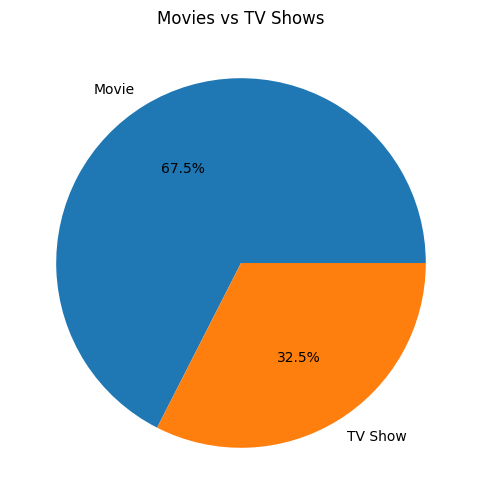

In [935]:
# ==============================
# 2. FIGURE 1: MOVIES VS TV SHOWS
# ==============================
plt.figure(figsize=(6, 6))
df["type"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Movies vs TV Shows")
plt.ylabel("")
plt.savefig(f"{visual_dir}01_movies_vs_tvshows.png", dpi=300, bbox_inches="tight")
plt.show()

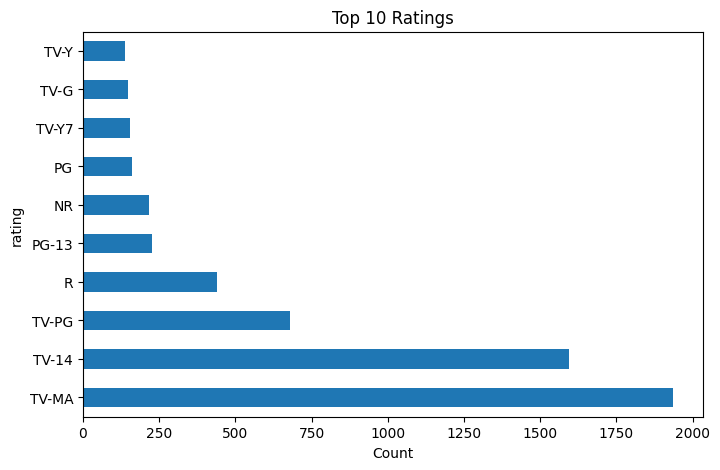

In [936]:
# ==============================
# 3. FIGURE 2: TOP 10 BEST RATINGS
# ==============================
plt.figure(figsize=(8, 5))
df["rating"].value_counts().head(10).plot(kind="barh")
plt.title("Top 10 Ratings")
plt.xlabel("Count")
plt.savefig(f"{visual_dir}02_top_ratings.png", dpi=300, bbox_inches="tight")
plt.show()

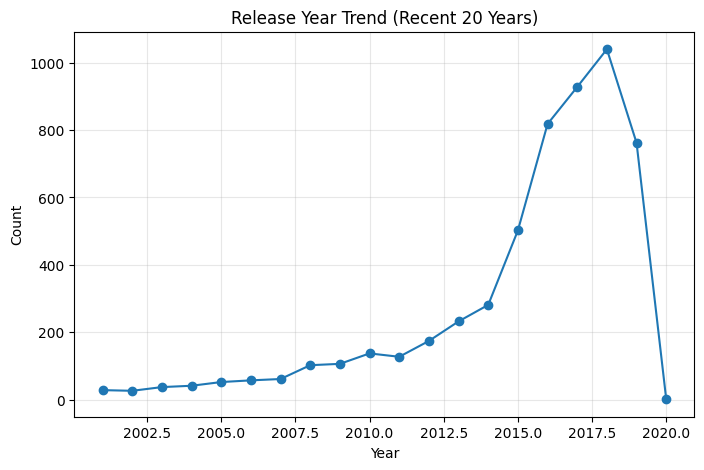

In [937]:
# ==============================
# 4. FIGURE 3: REALEASE YEAR TRENDS
# ==============================
plt.figure(figsize=(8, 5))
df["release_year"].value_counts().sort_index().tail(20).plot(marker="o")
plt.title("Release Year Trend (Recent 20 Years)")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True, alpha=0.3)
plt.savefig(f"{visual_dir}03_release_year_trend.png", dpi=300, bbox_inches="tight")
plt.show()

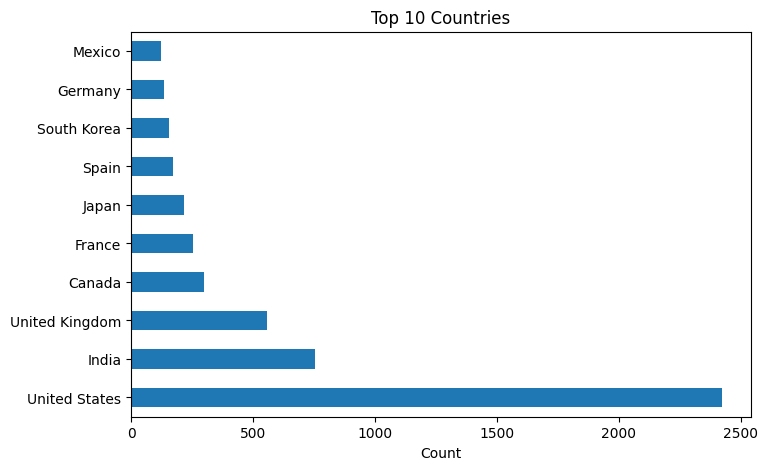

In [938]:
# ==============================
# 5. FIGURE 4: TOP 10 COUNTRIES
# ==============================
all_countries = []
for c in df["country"].dropna():
    for cc in str(c).split(","):
        all_countries.append(cc.strip())

country_dict = dict(Counter(all_countries).most_common(10))

plt.figure(figsize=(8, 5))
pd.Series(country_dict).plot(kind="barh")
plt.title("Top 10 Countries")
plt.xlabel("Count")
plt.savefig(f"{visual_dir}04_top_countries.png", dpi=300, bbox_inches="tight")
plt.show()

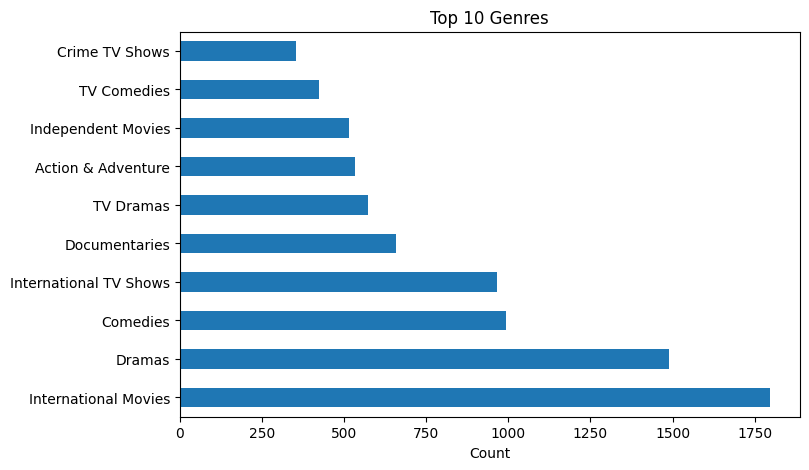

In [939]:
# ==============================
# 6. FIGURE 5: TOP 10 GENRES
# ==============================
all_genres = []
for g in df["listed_in"].dropna():
    for gg in str(g).split(","):
        all_genres.append(gg.strip())

genre_dict = dict(Counter(all_genres).most_common(10))

plt.figure(figsize=(8, 5))
pd.Series(genre_dict).plot(kind="barh")
plt.title("Top 10 Genres")
plt.xlabel("Count")
plt.savefig(f"{visual_dir}05_top_genres.png", dpi=300, bbox_inches="tight")
plt.show()

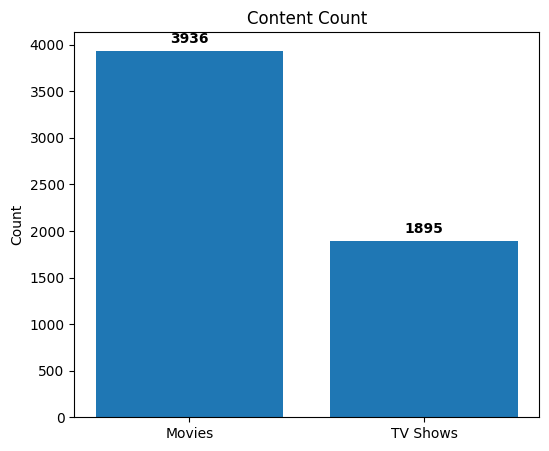

In [940]:
# ==============================
# 7. FIGURE 6: CONTENT COUNT
# ==============================
movies = len(df[df["type"] == "Movie"])
tv = len(df[df["type"] == "TV Show"])

plt.figure(figsize=(6, 5))
plt.bar(["Movies", "TV Shows"], [movies, tv])
plt.title("Content Count")
plt.ylabel("Count")

for i, v in enumerate([movies, tv]):
    plt.text(i, v + (0.02 * max(movies, tv)), str(v), ha="center", fontweight="bold")

plt.savefig(f"{visual_dir}06_content_count.png", dpi=300, bbox_inches="tight")
plt.show()

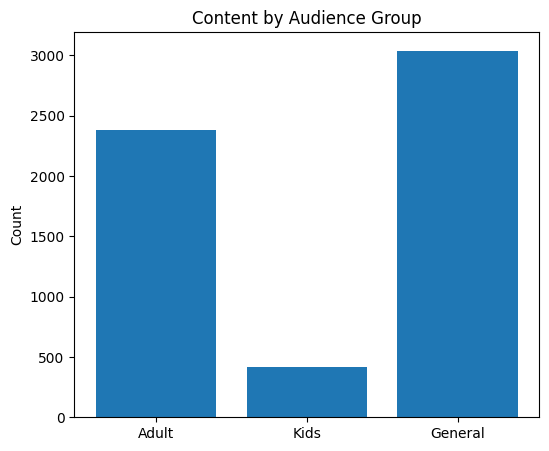

In [941]:
# ==============================
# 8. FIGURE 7: AUDIENS GROUP DISTRIBUTION
# ==============================
adult = len(df[df["audience_group"] == "Adult"])
kids = len(df[df["audience_group"] == "Kids"])
general = len(df[df["audience_group"] == "General"])

plt.figure(figsize=(6, 5))
plt.bar(["Adult", "Kids", "General"], [adult, kids, general])
plt.title("Content by Audience Group")
plt.ylabel("Count")

plt.savefig(f"{visual_dir}07_audience_group.png", dpi=300, bbox_inches="tight")
plt.show()

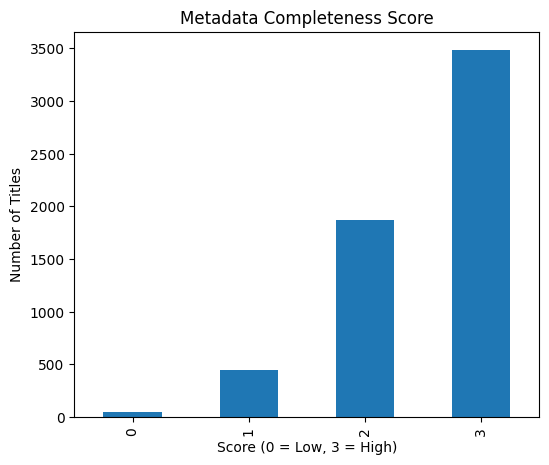

In [942]:
# ==============================
# 9. FIGURE 8: METEDATA COMPLETENESS
# ==============================
quality_counts = df["metadata_completeness"].value_counts().sort_index()

plt.figure(figsize=(6, 5))
quality_counts.plot(kind="bar")
plt.title("Metadata Completeness Score")
plt.xlabel("Score (0 = Low, 3 = High)")
plt.ylabel("Number of Titles")

plt.savefig(f"{visual_dir}08_metadata_completeness.png", dpi=300, bbox_inches="tight")
plt.show()

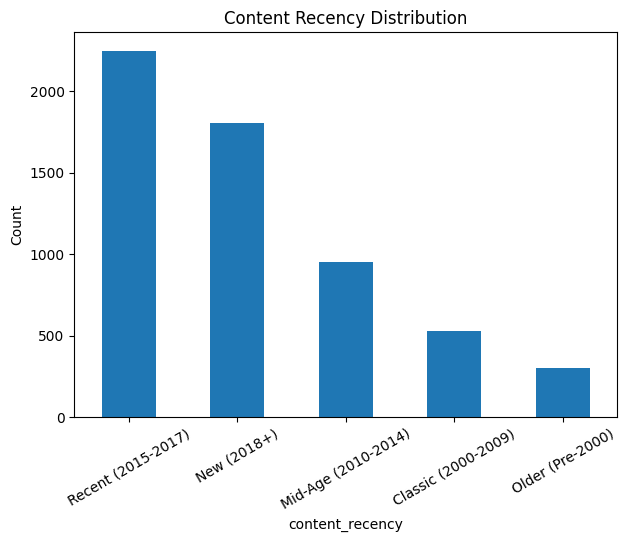

In [943]:
# ==============================
# 10. FIGURE 9: CONTENT RECENCY
# ==============================
plt.figure(figsize=(7, 5))
df["content_recency"].value_counts().plot(kind="bar")
plt.title("Content Recency Distribution")
plt.ylabel("Count")
plt.xticks(rotation=30)

plt.savefig(f"{visual_dir}09_content_recency.png", dpi=300, bbox_inches="tight")
plt.show()

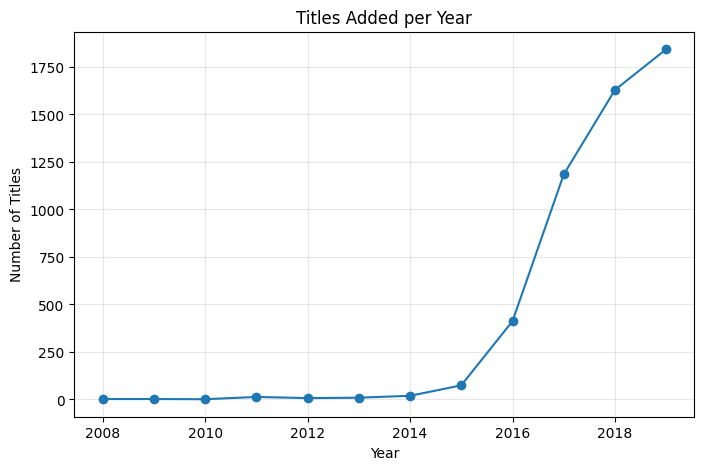

In [944]:
# ==============================
# 11. FIGURE 10: TITLES ADDED PER YEAR
# ==============================
valid_dates = df[df["date_added_missing"] == False]

titles_by_year = (
    valid_dates
    .groupby(valid_dates["date_added"].dt.year)
    .size()
)

plt.figure(figsize=(8, 5))
titles_by_year.plot(marker="o")
plt.title("Titles Added per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True, alpha=0.3)

plt.savefig(f"{visual_dir}10_titles_added_per_year.png", dpi=300, bbox_inches="tight")
plt.show()


<Figure size 900x500 with 0 Axes>

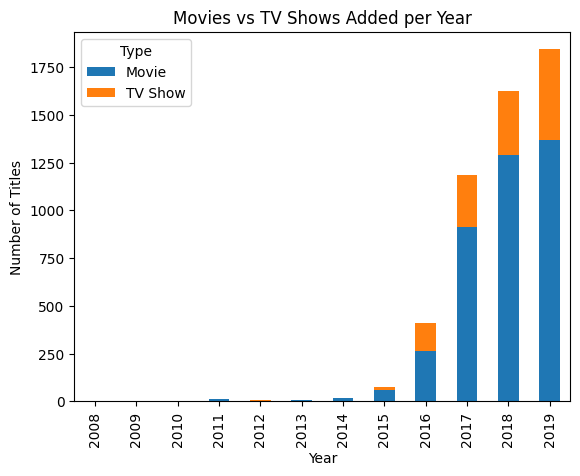

In [945]:
# ==============================
# 12. FIGURE 11: MOVIES VS TV SHOWS OVER TIME
# ==============================
format_by_year = (
    valid_dates
    .groupby([valid_dates["date_added"].dt.year, "type"])
    .size()
    .unstack(fill_value=0)
)

plt.figure(figsize=(9, 5))
format_by_year.plot(kind="bar", stacked=True)
plt.title("Movies vs TV Shows Added per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.legend(title="Type")

plt.savefig(f"{visual_dir}11_movies_vs_tvshows_over_time.png", dpi=300, bbox_inches="tight")
plt.show()


<Figure size 900x500 with 0 Axes>

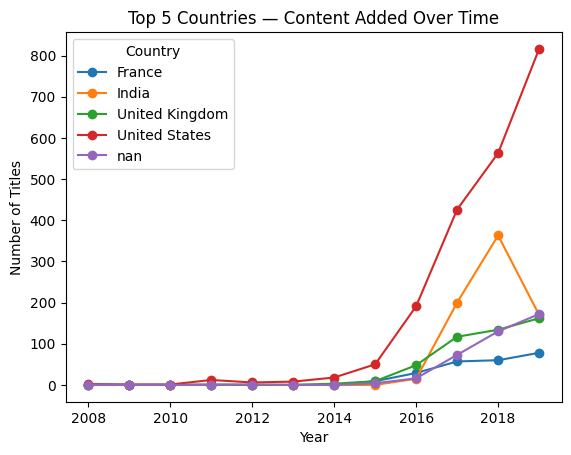

In [946]:
# ==============================
# 13. FIGURE 12: TOP 5 COUNTRY OVER TIME
# ==============================
country_year_data = []

for _, row in valid_dates.iterrows():
    year = row["date_added"].year
    countries = str(row["country"]).split(",")
    for c in countries:
        country_year_data.append((year, c.strip()))

country_year_df = pd.DataFrame(country_year_data, columns=["Year", "Country"])

top_countries = (
    country_year_df["Country"]
    .value_counts()
    .head(5)
    .index
)

country_trend = (
    country_year_df[country_year_df["Country"].isin(top_countries)]
    .groupby(["Year", "Country"])
    .size()
    .unstack(fill_value=0)
)

plt.figure(figsize=(9, 5))
country_trend.plot(marker="o")
plt.title("Top 5 Countries — Content Added Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.legend(title="Country")

plt.savefig(f"{visual_dir}12_top_countries_over_time.png", dpi=300, bbox_inches="tight")
plt.show()



<Figure size 900x500 with 0 Axes>

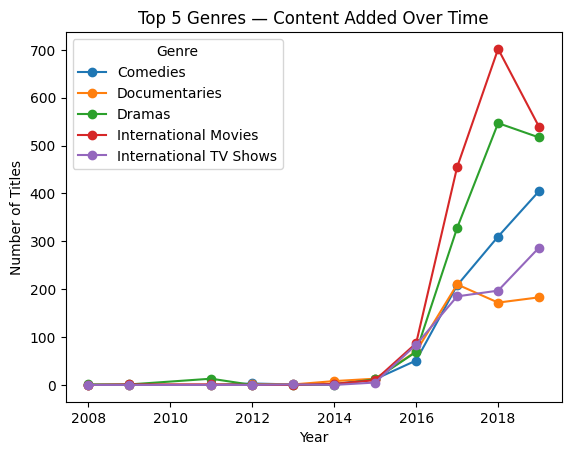

In [947]:
# ==============================
# 14. FIGURE 13: TOP 5 GENRES OVER TIME
# ==============================
genre_year_data = []

for _, row in valid_dates.iterrows():
    year = row["date_added"].year
    genres = str(row["listed_in"]).split(",")
    for g in genres:
        genre_year_data.append((year, g.strip()))

genre_year_df = pd.DataFrame(genre_year_data, columns=["Year", "Genre"])

top_genres = (
    genre_year_df["Genre"]
    .value_counts()
    .head(5)
    .index
)

genre_trend = (
    genre_year_df[genre_year_df["Genre"].isin(top_genres)]
    .groupby(["Year", "Genre"])
    .size()
    .unstack(fill_value=0)
)

plt.figure(figsize=(9, 5))
genre_trend.plot(marker="o")
plt.title("Top 5 Genres — Content Added Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.legend(title="Genre")

plt.savefig(f"{visual_dir}13_top_genres_over_time.png", dpi=300, bbox_inches="tight")
plt.show()


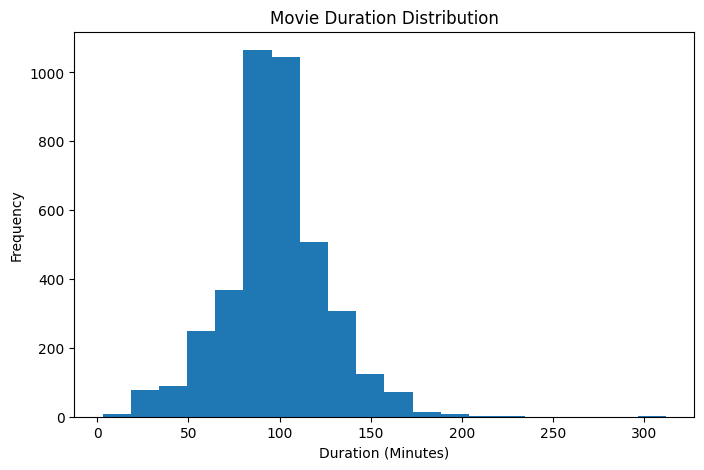

In [948]:
# ==============================
# 15. FIGURE 14: DURATION DISTRIBUTION FOR MOVIES ONLY
# ==============================
movies_df = df[df["duration_type"] == "min"]

plt.figure(figsize=(8, 5))
plt.hist(movies_df["duration_value"].dropna(), bins=20)
plt.title("Movie Duration Distribution")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Frequency")

plt.savefig(f"{visual_dir}14_movie_duration_histogram.png", dpi=300, bbox_inches="tight")
plt.show()


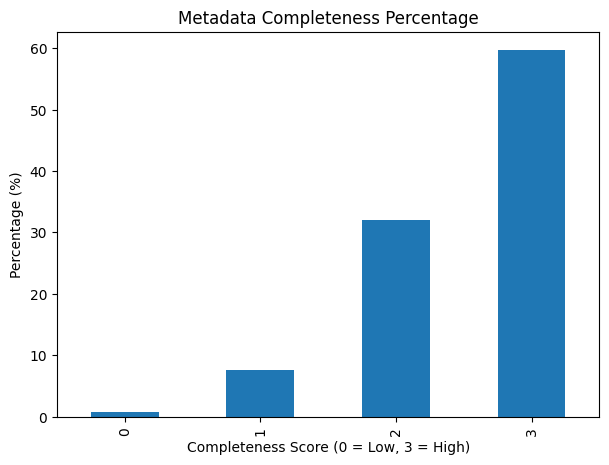

In [949]:
# ==============================
# 16. FIGURE 15: METADATA QUALITY KPI
# ==============================
quality_pct = (
    df["metadata_completeness"]
    .value_counts(normalize=True)
    .sort_index() * 100
)

plt.figure(figsize=(7, 5))
quality_pct.plot(kind="bar")
plt.title("Metadata Completeness Percentage")
plt.xlabel("Completeness Score (0 = Low, 3 = High)")
plt.ylabel("Percentage (%)")

plt.savefig(f"{visual_dir}15_metadata_quality_percentage.png", dpi=300, bbox_inches="tight")
plt.show()


### 5. Insights

This notebook summarizes key findings from the Netflix content analysis by translating exploratory and visualization results into strategic, business-oriented insights.  

The objective is to highlight content strategy, audience targeting, global expansion patterns, and data quality readiness to support executive decision-making and dashboard storytelling.


In [950]:
# ==============================
# 1. KEY METRICS
# ==============================
total_titles = len(df)
movies = len(df[df["type"] == "Movie"])
tv = len(df[df["type"] == "TV Show"])

adult = len(df[df["audience_group"] == "Adult"])
kids = len(df[df["audience_group"] == "Kids"])
general = len(df[df["audience_group"] == "General"])

recent = len(df[df["content_recency"] == "Recent (2017+)"])
metadata_high = len(df[df["metadata_completeness"] == 3])
missing_dates = len(df[df["date_added_missing"] == True])

print("\nEXECUTIVE SUMMARY — KEY METRICS")
print(f"  Total Titles: {total_titles:,}")
print(f"  Movies: {movies:,} ({movies/total_titles*100:.1f}%)")
print(f"  TV Shows: {tv:,} ({tv/total_titles*100:.1f}%)")

print("\nAUDIENCE SEGMENTATION")
print(f"  Adult: {adult:,} ({adult/total_titles*100:.1f}%)")
print(f"  Kids: {kids:,} ({kids/total_titles*100:.1f}%)")
print(f"  General: {general:,} ({general/total_titles*100:.1f}%)")

print("\nCONTENT FRESHNESS")
print(f"  Recent Content (2017+): {recent:,} ({recent/total_titles*100:.1f}%)")

print("\nDATA QUALITY")
print(f"  High Metadata Completeness (Score = 3): {metadata_high:,} ({metadata_high/total_titles*100:.1f}%)")
print(f"  Missing Date Added: {missing_dates:,} ({missing_dates/total_titles*100:.1f}%)")



EXECUTIVE SUMMARY — KEY METRICS
  Total Titles: 5,837
  Movies: 3,936 (67.4%)
  TV Shows: 1,895 (32.5%)

AUDIENCE SEGMENTATION
  Adult: 2,378 (40.7%)
  Kids: 419 (7.2%)
  General: 3,040 (52.1%)

CONTENT FRESHNESS
  Recent Content (2017+): 0 (0.0%)

DATA QUALITY
  High Metadata Completeness (Score = 3): 3,482 (59.7%)
  Missing Date Added: 642 (11.0%)


In [951]:
# ==============================
# 2. TOP CONTENT DOMINANCE
# ==============================
all_genres = []
for g in df["listed_in"].dropna():
    for gg in str(g).split(","):
        all_genres.append(gg.strip())

genre_counts = Counter(all_genres)

all_countries = []
for c in df["country"].dropna():
    for cc in str(c).split(","):
        all_countries.append(cc.strip())

country_counts = Counter(all_countries)

print("\nTOP 5 GENRES")
for i, (genre, count) in enumerate(genre_counts.most_common(5), 1):
    pct = count / total_titles * 100
    print(f"  {i}. {genre}: {count:,} titles ({pct:.1f}%)")

print("\nTOP 5 PRODUCING COUNTRIES")
for i, (country, count) in enumerate(country_counts.most_common(5), 1):
    pct = count / total_titles * 100
    print(f"  {i}. {country}: {count:,} titles ({pct:.1f}%)")



TOP 5 GENRES
  1. International Movies: 1,797 titles (30.8%)
  2. Dramas: 1,488 titles (25.5%)
  3. Comedies: 992 titles (17.0%)
  4. International TV Shows: 966 titles (16.5%)
  5. Documentaries: 658 titles (11.3%)

TOP 5 PRODUCING COUNTRIES
  1. United States: 2,421 titles (41.5%)
  2. India: 753 titles (12.9%)
  3. United Kingdom: 559 titles (9.6%)
  4. Canada: 300 titles (5.1%)
  5. France: 255 titles (4.4%)


In [952]:
# ==============================
# 3. STRATEGIC INSIGHTS
# ==============================
usa_titles = country_counts.get("United States", 0)
intl_titles = total_titles - usa_titles

top_genre, top_genre_count = genre_counts.most_common(1)[0]

print("\nSTRATEGIC INSIGHTS")

print("\n1️. CONTENT MIX STRATEGY")
print(f"   • Movies dominate the library ({movies/total_titles*100:.1f}%), indicating a focus on scalable,")
print("     lower-commitment content compared to long-term series investments.")
print(f"   • TV Shows represent {tv/total_titles*100:.1f}%, supporting user retention through episodic engagement.")

print("\n2️. AUDIENCE TARGETING")
print(f"   • Adult-oriented content leads the catalog ({adult/total_titles*100:.1f}%).")
print("   • This suggests Netflix prioritizes its primary revenue-generating demographic segment.")

print("\n3️. CONTENT FRESHNESS & COMPETITIVE POSITIONING")
print(f"   • {recent/total_titles*100:.1f}% of titles are recent (2017+),")
print("     indicating strong emphasis on up-to-date content to remain competitive in the streaming market.")

print("\n4️. GLOBAL EXPANSION STRATEGY")
print(f"   • United States accounts for {usa_titles:,} titles ({usa_titles/total_titles*100:.1f}%).")
print(f"   • International content represents {intl_titles/total_titles*100:.1f}%,")
print("     reflecting a deliberate strategy to grow regional and global market presence.")

print("\n5️. GENRE POSITIONING")
print(f"   • '{top_genre}' is the most dominant genre with {top_genre_count:,} titles.")
print("   • This highlights Netflix’s positioning as a platform centered on story-driven and international narratives.")

print("\n6️. DATA READINESS FOR DASHBOARDING")
print(f"   • {metadata_high/total_titles*100:.1f}% of titles have high metadata completeness,")
print("     ensuring strong reliability for Power BI filtering, segmentation, and KPI reporting.")
print(f"   • {missing_dates/total_titles*100:.1f}% missing 'date_added' should be flagged in time-based dashboards.")



STRATEGIC INSIGHTS

1️. CONTENT MIX STRATEGY
   • Movies dominate the library (67.4%), indicating a focus on scalable,
     lower-commitment content compared to long-term series investments.
   • TV Shows represent 32.5%, supporting user retention through episodic engagement.

2️. AUDIENCE TARGETING
   • Adult-oriented content leads the catalog (40.7%).
   • This suggests Netflix prioritizes its primary revenue-generating demographic segment.

3️. CONTENT FRESHNESS & COMPETITIVE POSITIONING
   • 0.0% of titles are recent (2017+),
     indicating strong emphasis on up-to-date content to remain competitive in the streaming market.

4️. GLOBAL EXPANSION STRATEGY
   • United States accounts for 2,421 titles (41.5%).
   • International content represents 58.5%,
     reflecting a deliberate strategy to grow regional and global market presence.

5️. GENRE POSITIONING
   • 'International Movies' is the most dominant genre with 1,797 titles.
   • This highlights Netflix’s positioning as a plat

### 6. Limitations

This analysis is subject to data quality constraints, particularly missing values in the `date_added` and `country` columns. These gaps may affect the accuracy of time-based trends and geographic distribution insights. Additionally, the dataset reflects a snapshot from November 2019 and does not capture subsequent changes in Netflix’s content strategy or library expansion.


### 7. Business Recommendations

Based on the findings, the following strategic actions are recommended:
- Expand investment in international drama and regional content to strengthen global market penetration.
- Increase family and kids-oriented content to balance the current adult-heavy catalog and broaden audience reach.
- Improve metadata completeness for older titles to enhance content discoverability, recommendation system performance, and dashboard reliability.


## FINAL CONCLUSION

Netflix’s content strategy reflects a strong focus on scalability, adult audience dominance,
and aggressive global expansion. The high proportion of recent titles reinforces a competitive
position in the fast-moving streaming market, while genre concentration highlights a clear
brand identity around drama and international storytelling.

From a data perspective, the dataset is largely dashboard-ready, with strong metadata completeness.
However, missing time-based information should be explicitly handled in temporal trend analysis